# Week 01: GenomicRanges - Basic GRanges Usage

## 01. IRanges - Basic Usage


### Overview
A surprising amount of objects/tasks in computational biology can be formulated in terms of integer intervals, manipulation of integer intervals and overlap of integer intervals.

Objects: A transcript (a union of integer intervals), a collection of SNPs (intervals of width 1), transcription factor binding sites, a collection of aligned short reads.

Tasks: Which transcription factor binding sites hit the promoter of genes (overlap between two sets of intervals), which SNPs hit a collection of exons, which short reads hit a predetermined set of exons.

IRanges are collections of integer intervals. GRanges are like IRanges, but with an associated chromosome and strand, taking care of some book keeping.

Here we discuss IRanges, which provides the foundation for GRanges. This package implements (amongst other things) an algebra for handling integer intervals.



### Dependencies

In [4]:
# This document has the following dependencies:
# BiocManager::install("IRanges")
library(IRanges)

Loading required package: S4Vectors

Loading required package: stats4


Attaching package: 'S4Vectors'


The following objects are masked from 'package:base':

    expand.grid, I, unname



Attaching package: 'IRanges'


The following object is masked from 'package:grDevices':

    windows




In [5]:
## Plot Iranges
plotRanges <- function(x, xlim = x, main = deparse(substitute(x)),
                       col = "black", sep = 0.5, ...) {
    opar <- par(mar = c(5,1,1.5,1))
    on.exit(par(opar))
    height <- 1
    if (is(xlim, "Ranges"))
        xlim <- c(min(start(xlim)), max(end(xlim)))
    bins <- disjointBins(IRanges(start(x), end(x) + 1))
    plot.new()
    plot.window(xlim, c(0, max(bins)*(height + sep)))
    ybottom <- bins * (sep + height) - height
    rect(start(x)-0.5, ybottom, end(x)+0.5, ybottom + height, col = col, ...)
    title(main)
    axis(1)
}

### Basic IRanges

In [6]:
# Specify IRanges by 2 of start, end, width (SEW).
ir1 <- IRanges(start = c(1,3,5), end = c(3,5,7))
ir1

IRanges object with 3 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         3         3
  [2]         3         5         3
  [3]         5         7         3

In [7]:
ir2 <- IRanges(start = c(1,3,5), width = 3)
all.equal(ir1, ir2)

[1] TRUE

An **IRanges** consist of separate intervals; each interval is called a `range`. So ir1 above contains 3 ranges.

Assessor methods: `start()`, `end()`, `width()` and also replacement methods.

In [8]:
start(ir1)

[1] 1 3 5

In [9]:
width(ir2) <- 1
ir2

IRanges object with 3 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         1         1
  [2]         3         3         1
  [3]         5         5         1

In [10]:
# They may have names
names(ir1) <- paste("A", 1:3, sep = "")
ir1

IRanges object with 3 ranges and 0 metadata columns:
         start       end     width
     <integer> <integer> <integer>
  A1         1         3         3
  A2         3         5         3
  A3         5         7         3

In [11]:
# They have a single dimension
dim(ir1)

NULL

In [12]:
length(ir1)

[1] 3

In [13]:
# Because of this, subsetting works like a vector
ir1[1]

IRanges object with 1 range and 0 metadata columns:
         start       end     width
     <integer> <integer> <integer>
  A1         1         3         3

In [14]:
ir1["A1"]

IRanges object with 1 range and 0 metadata columns:
         start       end     width
     <integer> <integer> <integer>
  A1         1         3         3

In [15]:
# Like vectors, you can concatenate two IRanges with the c() function
c(ir1, ir2)

IRanges object with 6 ranges and 0 metadata columns:
         start       end     width
     <integer> <integer> <integer>
  A1         1         3         3
  A2         3         5         3
  A3         5         7         3
             1         1         1
             3         3         1
             5         5         1

### Normal IRanges

A normal IRanges is a minimal representation of the IRanges viewed as a set. Each integer only occur in a single range and there are as few ranges as possible. In addition, it is ordered. Many functions produce a normal IRanges. Created by `reduce()`.

In [16]:
ir <- IRanges(start = c(1,3,7,9), end = c(4,4,8,10))
ir

IRanges object with 4 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         4         4
  [2]         3         4         2
  [3]         7         8         2
  [4]         9        10         2

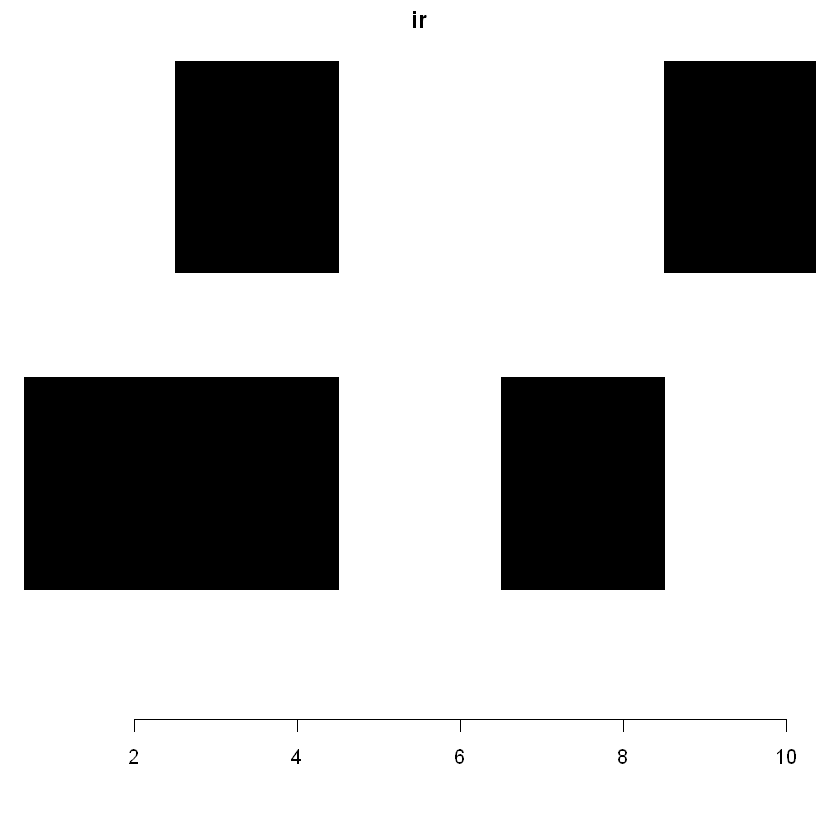

In [17]:
plotRanges(ir)

In [18]:
reduce(ir)

IRanges object with 2 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         4         4
  [2]         7        10         4

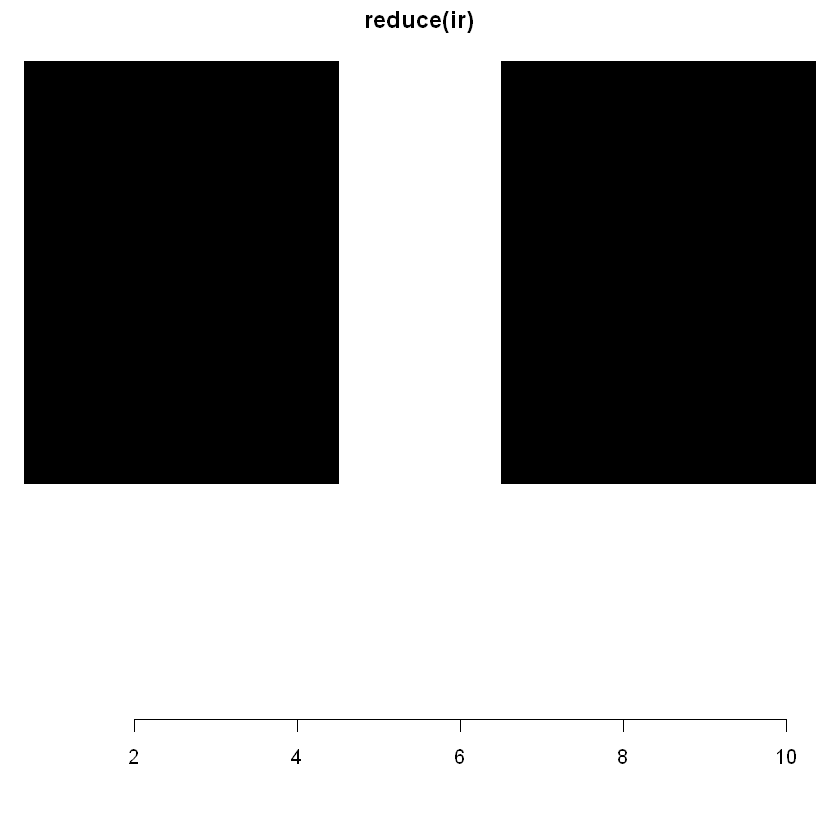

In [19]:
plotRanges(reduce(ir))

From some perspective, `disjoin()` is the opposite of reduce(). An example explains better:

In [20]:
ir1

IRanges object with 3 ranges and 0 metadata columns:
         start       end     width
     <integer> <integer> <integer>
  A1         1         3         3
  A2         3         5         3
  A3         5         7         3

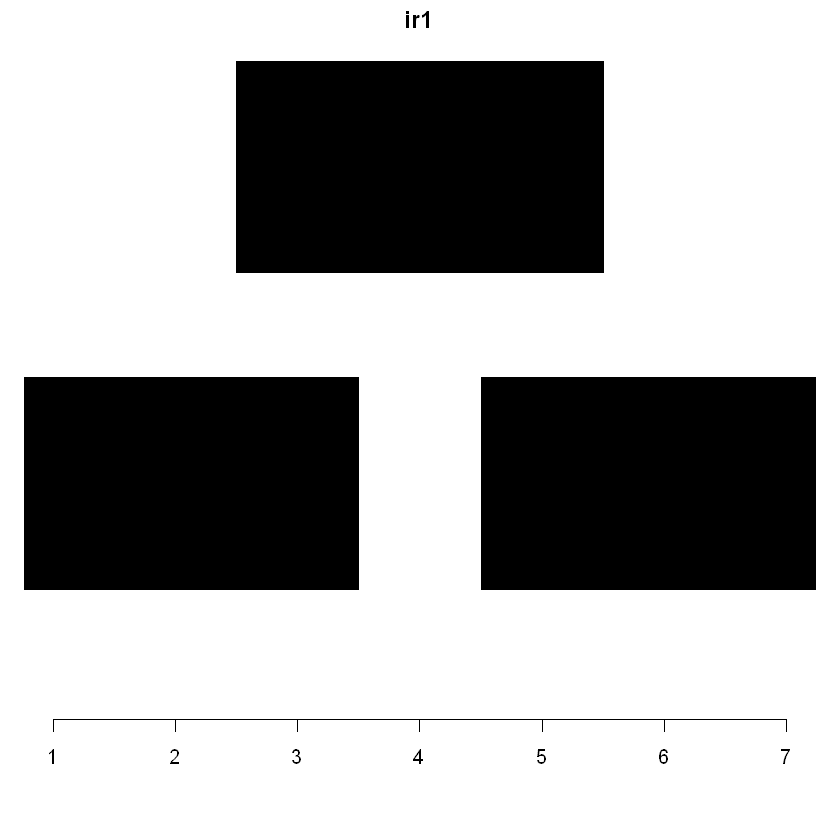

In [21]:
plotRanges(ir1)

In [22]:
disjoin(ir1)

IRanges object with 5 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         2         2
  [2]         3         3         1
  [3]         4         4         1
  [4]         5         5         1
  [5]         6         7         2

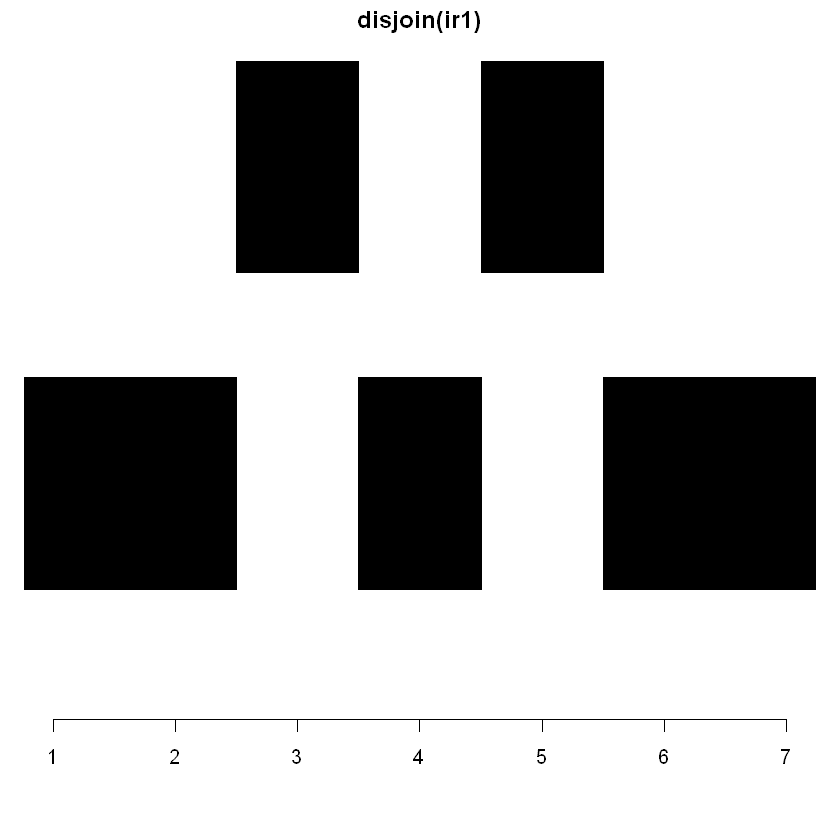

In [23]:
plotRanges(disjoin(ir1))

### Manipulating IRanges, intra-range
“Intra-range” manipulations are manipulations where each original range gets mapped to a new range.

Examples of these are: `shift()`, `narrow()`, `flank()`, `resize()`, `restrict()`.

For example, `resize()` can be extremely useful. It has a fix argument controlling where the resizing occurs from. Use fix="center" to resize around the center of the ranges; I use this a lot.

In [24]:
resize(ir, width = 1, fix = "start")

IRanges object with 4 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         1         1
  [2]         3         3         1
  [3]         7         7         1
  [4]         9         9         1

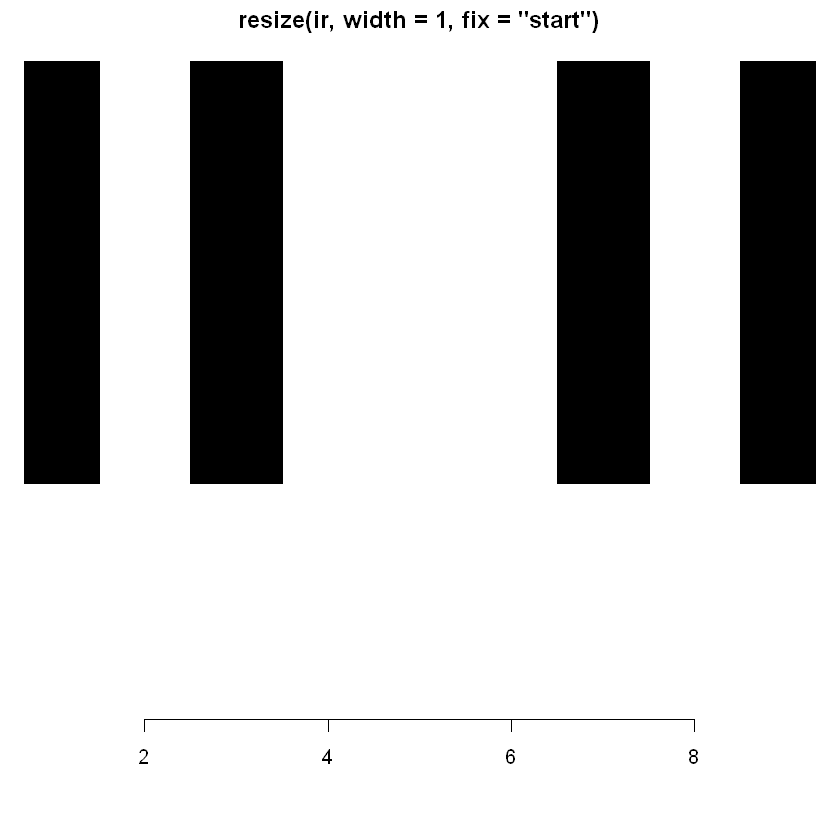

In [25]:
plotRanges(resize(ir, width = 1, fix = "start"))

In [26]:
resize(ir, width = 1, fix = "center")

IRanges object with 4 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         2         2         1
  [2]         3         3         1
  [3]         7         7         1
  [4]         9         9         1

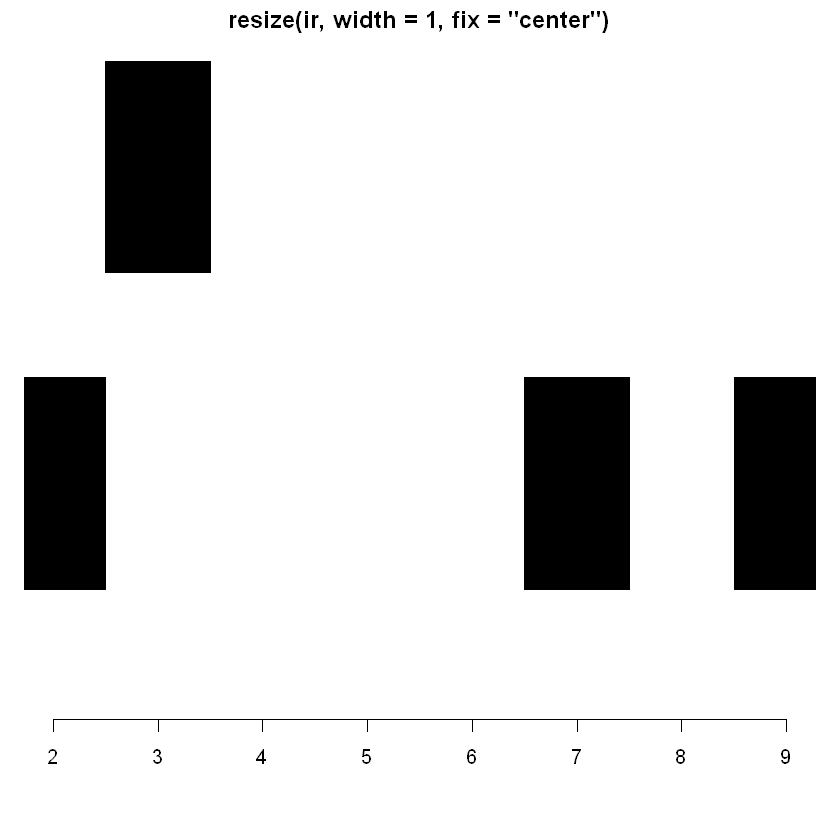

In [27]:
plotRanges(resize(ir, width = 1, fix = "center"))

### Manipulating IRanges, as sets

Manipulating IRanges as sets means that we view each IRanges as a set of integers; individual integers is either contained in one or more ranges or they are not. This is equivalent to calling reduce() on the IRanges first.

Once this is done, we can use standard: `union()`, `intersect()`, `setdiff()`, `gaps()` between two IRanges (which all returns normalized IRanges).

In [28]:
ir1 <- IRanges(start = c(1, 3, 5), width = 1)
ir2 <- IRanges(start = c(4, 5, 6), width = 1)
union(ir1, ir2)

IRanges object with 2 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         1         1
  [2]         3         6         4

In [29]:
intersect(ir1, ir2)

IRanges object with 1 range and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         5         5         1

In [30]:
# Because they return normalized IRanges, an alternative to union() is
reduce(c(ir1, ir2))

IRanges object with 2 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         1         1
  [2]         3         6         4

There is also an element-wise (pair-wise) version of these: punion(), pintersect(), psetdiff(), pgap(); this is similar to say pmax from base R. In my experience, these functions are seldom used.

### Finding Overlaps
Finding (pairwise) overlaps between two IRanges is done by `findOverlaps()`. This function is very important and amazingly fast!

In [31]:
ir1 <- IRanges(start = c(1,4,8), end = c(3,7,10))
ir2 <- IRanges(start = c(3,4), width = 3)
ov <- findOverlaps(ir1, ir2)
ov

Hits object with 3 hits and 0 metadata columns:
      queryHits subjectHits
      <integer>   <integer>
  [1]         1           1
  [2]         2           1
  [3]         2           2
  -------
  queryLength: 3 / subjectLength: 2

It returns a Hits object which describes the relationship between the two IRanges. This object is basically a two-column matrix of indicies into the two IRanges.

The two columns of the hits object can be accessed by `queryHits()` and `subjectHits()` (often used with unique()).

For example, the first row of the matrix describes that the first range of ir1 overlaps with the first range of ir2. Or said differently, they have a non-empty intersection:

In [32]:
intersect(ir1[subjectHits(ov)[1]],
          ir2[queryHits(ov)[2]])

IRanges object with 0 ranges and 0 metadata columns:
       start       end     width
   <integer> <integer> <integer>

The elements of `unique(queryHits)` gives you the indices of the query ranges which actually had an overlap; you need unique because a query range may overlap multiple subject range

In [33]:
queryHits(ov)

[1] 1 2 2

In [34]:
unique(queryHits(ov))

[1] 1 2

*The list of arguments to `findOverlaps()` is long; there are a few hidden treasures here. For example, you can ask to only get an overlap if two ranges overlap by a certain number of bases.*

In [35]:
args(findOverlaps)

function (query, subject, maxgap = -1L, minoverlap = 0L, type = c("any", 
    "start", "end", "within", "equal"), select = c("all", "first", 
    "last", "arbitrary"), ...) 
NULL

### countOverlaps
For efficiency, there is also countOverlaps(), which just returns the number of overlaps. This function is faster and takes up less memory because it does not have to keep track of which ranges overlap, just the number of overlaps.

In [36]:
countOverlaps(ir1, ir2)

[1] 1 2 0

### Finding nearest IRanges
Sometimes you have two sets of IRanges and you need to know which ones are closest to each other. Functions for this include `nearest()`, `precede()`, `follow()`. Watch out for ties!

In [37]:
ir1

IRanges object with 3 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         3         3
  [2]         4         7         4
  [3]         8        10         3

In [38]:
ir2

IRanges object with 2 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         3         5         3
  [2]         4         6         3

In [39]:
nearest(ir1, ir2)

[1] 1 1 2

## 02: GenomicRanges - GRanges

### Dependencies

In [40]:
# Install Genomic Ranges Library
library(GenomicRanges)

Loading required package: GenomeInfoDb



##

**`GRanges`** : `GRanges` are like `IRanges` with strand and chromosome. Strand can be +, - and *. The value * indicates ‘unknown strand’ or ‘unstranded’. This value usually gets treated as a third strand, which is sometimes confusing to users (examples below).

In [41]:
## They get created with the GRanges constructor:
gr <- GRanges(seqnames = "chr1", strand = c("+", "-", "+"),
              ranges = IRanges(start = c(1,3,5), width = 3))
gr

GRanges object with 3 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       1-3      +
  [2]     chr1       3-5      -
  [3]     chr1       5-7      +
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

Natural accessor functions: 
- strand(), 
- seqnames(), 
- ranges(), 
- start(), 
- end(), 
- width().
Because the have strand, we now have operations which are relative to the direction of transcription (`upstream()`, `downstream()`):

In [42]:
flank(gr, 2, start = FALSE)

GRanges object with 3 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       4-5      +
  [2]     chr1       1-2      -
  [3]     chr1       8-9      +
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [43]:
# GRanges, seqinfo
# GRanges operate within a universe of sequences (chromosomes/contigs) and their lengths.
# This is described through seqinfo:
seqinfo(gr)

Seqinfo object with 1 sequence from an unspecified genome; no seqlengths:
  seqnames seqlengths isCircular genome
  chr1             NA         NA   <NA>

In [44]:
seqlengths(gr) <- c("chr1" = 10)
seqinfo(gr)

Seqinfo object with 1 sequence from an unspecified genome:
  seqnames seqlengths isCircular genome
  chr1             10         NA   <NA>

In [45]:
seqlevels(gr)

[1] "chr1"

In [46]:
seqlengths(gr)

chr1 
  10

In [47]:
# Especially the length of the chromosomes are used by some functions. For example gaps() return the stretches of the genome not covered by the GRanges.
gaps(gr)

GRanges object with 5 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1         4      +
  [2]     chr1      8-10      +
  [3]     chr1       1-2      -
  [4]     chr1      6-10      -
  [5]     chr1      1-10      *
  -------
  seqinfo: 1 sequence from an unspecified genome

In this example, we know that the last gap stops at 10, because that is the length of the chromosome. Note how a range on the * strand appears in the result.

In [48]:
# Let us expand the GRanges with another chromosome
seqlevels(gr) <- c("chr1", "chr2")
seqnames(gr) <- c("chr1", "chr2", "chr1")

In [49]:
gr

GRanges object with 3 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       1-3      +
  [2]     chr2       3-5      -
  [3]     chr1       5-7      +
  -------
  seqinfo: 2 sequences from an unspecified genome

When you `sort()` a GRanges, the sorting order of the chromosomes is determined by their order in seqlevel. This is nice if you want the sorting “chr1”, “chr2”, …, “chr10”, …

In [50]:
sort(gr)

GRanges object with 3 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       1-3      +
  [2]     chr1       5-7      +
  [3]     chr2       3-5      -
  -------
  seqinfo: 2 sequences from an unspecified genome

In [51]:
# You can associate a genome with a GRanges.
genome(gr) <- "hg19"
gr

GRanges object with 3 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       1-3      +
  [2]     chr2       3-5      -
  [3]     chr1       5-7      +
  -------
  seqinfo: 2 sequences from hg19 genome

This becomes valuable when you deal with data from different genome versions (as we all do), because it allows R to throw an error when you compare two `GRanges` from **different genomes**, like

In [52]:
gr2 <- gr
genome(gr2) <- "hg18"
findOverlaps(gr, gr2)

ERROR: Error in mergeNamedAtomicVectors(genome(x), genome(y), what = c("sequence", : sequences chr1, chr2 have incompatible genomes:
  - in 'x': hg19, hg19
  - in 'y': hg18, hg18


## GenomicRanges - Basic GRanges Usage

### DataFrame
The [S4Vectors](https://bioconductor.org/packages/release/bioc/html/S4Vectors.html) package introduced the DataFrame class. This class is very similar to the base data.frame class from R, but it allows columns of any class, provided a number of required methods are supported. For example, DataFrame can have IRanges as columns, unlike data.frame:

In [ ]:
ir <- IRanges(start = 1:2, width = 3)
df1 <- DataFrame(iranges = ir)
df1

DataFrame with 2 rows and 1 column
    iranges
  <IRanges>
1       1-3
2       2-4

In [ ]:
df1$iranges

IRanges object with 2 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         3         3
  [2]         2         4         3

In [ ]:
df2 <- data.frame(iranges = ir)
df2

iranges.start,iranges.end,iranges.width
<int>,<int>,<int>
1,3,3
2,4,3


In the data.frame case, the IRanges gives rise to 4 columns, whereas it is a single column when a DataFrame is used.

### GRanges, metadata
`GRanges` (unlike IRanges) may have **associated metadata**. This is immensely useful. The formal way to access and set this metadata is through values or elementMetadata or mcols, like

In [ ]:
gr <- GRanges(seqnames = "chr1", strand = c("+", "-", "+"),
              ranges = IRanges(start = c(1,3,5), width = 3))
values(gr) <- DataFrame(score = c(0.1, 0.5, 0.3))
gr

GRanges object with 3 ranges and 1 metadata column:
      seqnames    ranges strand |     score
         <Rle> <IRanges>  <Rle> | <numeric>
  [1]     chr1       1-3      + |       0.1
  [2]     chr1       3-5      - |       0.5
  [3]     chr1       5-7      + |       0.3
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [ ]:
# A much easier way to set and access metadata is through the $ operator
gr$score

[1] 0.1 0.5 0.3

In [ ]:
gr$score2 = gr$score * 0.2
gr

GRanges object with 3 ranges and 2 metadata columns:
      seqnames    ranges strand |     score    score2
         <Rle> <IRanges>  <Rle> | <numeric> <numeric>
  [1]     chr1       1-3      + |       0.1      0.02
  [2]     chr1       3-5      - |       0.5      0.10
  [3]     chr1       5-7      + |       0.3      0.06
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

### findOverlaps
`findOverlaps` works exactly as for IRanges. But the strand information can be confusing. Let us make an example

In [ ]:
gr2 <- GRanges(seqnames = c("chr1", "chr2", "chr1"), strand = "*",
               ranges = IRanges(start = c(1, 3, 5), width = 3))
gr2

GRanges object with 3 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       1-3      *
  [2]     chr2       3-5      *
  [3]     chr1       5-7      *
  -------
  seqinfo: 2 sequences from an unspecified genome; no seqlengths

In [ ]:
gr

GRanges object with 3 ranges and 2 metadata columns:
      seqnames    ranges strand |     score    score2
         <Rle> <IRanges>  <Rle> | <numeric> <numeric>
  [1]     chr1       1-3      + |       0.1      0.02
  [2]     chr1       3-5      - |       0.5      0.10
  [3]     chr1       5-7      + |       0.3      0.06
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

Note how the ranges in the two GRanges object are the same coordinates, they just have different seqnames and strand. Let us try to do a standard `findOverlaps`:

In [ ]:
findOverlaps(gr, gr2)


Hits object with 4 hits and 0 metadata columns:
      queryHits subjectHits
      <integer>   <integer>
  [1]         1           1
  [2]         2           1
  [3]         2           3
  [4]         3           3
  -------
  queryLength: 3 / subjectLength: 3

Notice how the `*` strand overlaps both + and -. There is an argument `ignore.strand` to findOverlaps which will … ignore the strand information (so + overlaps -). Several other functions in GenomicRanges have an ignore.strand argument as well.

In [ ]:
findOverlaps(gr, gr2,ignore.strand = TRUE)

Hits object with 4 hits and 0 metadata columns:
      queryHits subjectHits
      <integer>   <integer>
  [1]         1           1
  [2]         2           1
  [3]         2           3
  [4]         3           3
  -------
  queryLength: 3 / subjectLength: 3

### subsetByOverlaps

A common operation is to select only certain ranges from a GRanges which overlap something else. Enter the convenience function `subsetByOverlaps`

In [ ]:
subsetByOverlaps(gr, gr2)

GRanges object with 3 ranges and 2 metadata columns:
      seqnames    ranges strand |     score    score2
         <Rle> <IRanges>  <Rle> | <numeric> <numeric>
  [1]     chr1       1-3      + |       0.1      0.02
  [2]     chr1       3-5      - |       0.5      0.10
  [3]     chr1       5-7      + |       0.3      0.06
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

### makeGRangesFromDataFrame
A common situation is that you have data which looks like a GRanges but is really stored as a classic data.frame, with chr, start etc. The makeGRangesFromDataFrame converts this data.frame into a GRanges. An argument tells you whether you want to keep any additional column.

In [ ]:
df <- data.frame(chr = "chr1", start = 1:3, end = 4:6, score = 7:9)
makeGRangesFromDataFrame(df)

GRanges object with 3 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       1-4      *
  [2]     chr1       2-5      *
  [3]     chr1       3-6      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [ ]:
makeGRangesFromDataFrame(df, keep.extra.columns = TRUE)

GRanges object with 3 ranges and 1 metadata column:
      seqnames    ranges strand |     score
         <Rle> <IRanges>  <Rle> | <integer>
  [1]     chr1       1-4      * |         7
  [2]     chr1       2-5      * |         8
  [3]     chr1       3-6      * |         9
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

## GenomicRanges - seqinfo

In [ ]:
## 
library(GenomeInfoDb)
library(GenomicRanges)


### Drop and keep seqlevels
It is common to want to remove seqlevels from a GRanges object. Here are some equivalent methods

In [ ]:
gr <- GRanges(seqnames = c("chr1", "chr2"),
              ranges = IRanges(start = 1:2, end = 4:5))
dropSeqlevels(gr, "chr1", pruning.mode="coarse")


GRanges object with 1 range and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr2       2-5      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [ ]:
keepSeqlevels(gr, "chr2", pruning.mode = "coarse")

GRanges object with 1 range and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr2       2-5      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [ ]:
gr <- GRanges(seqnames = c("chr1", "chrU345"),
              ranges = IRanges(start = 1:2, end = 4:5))


In [ ]:
# You can also just get rid of weird looking chromosome names with keepStandardChromosomes().
keepStandardChromosomes(gr,pruning.mode="coarse")

GRanges object with 1 range and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       1-4      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

### Changing style
It is an inconvenient truth that different online resources uses different naming convention for chromosomes. This can even be different from organism to organism. For example, for the fruitfly (Drosophila Melanogaster) NCBI and Ensembl uses “2L” and UCSC uses “chr2L”. But NCBI and Ensembl differs on some contigs: NCBI uses “Un” and Ensembl used “U”.

In [ ]:
gr <- GRanges(seqnames = "chr1", ranges = IRanges(start = 1:2, width = 2))
gr

GRanges object with 2 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       1-2      *
  [2]     chr1       2-3      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [ ]:
gr <- GRanges(rep(c("chr2", "chr3", "chrM"), 2), IRanges(1:6, 10))
gr

GRanges object with 6 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr2      1-10      *
  [2]     chr3      2-10      *
  [3]     chrM      3-10      *
  [4]     chr2      4-10      *
  [5]     chr3      5-10      *
  [6]     chrM      6-10      *
  -------
  seqinfo: 3 sequences from an unspecified genome; no seqlengths

In [ ]:
seqlevelsStyle(gr)
seqlevelsStyle(gr) <- "NCBI"
gr

[1] "UCSC"

GRanges object with 6 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]        2      1-10      *
  [2]        3      2-10      *
  [3]       MT      3-10      *
  [4]        2      4-10      *
  [5]        3      5-10      *
  [6]       MT      6-10      *
  -------
  seqinfo: 3 sequences from an unspecified genome; no seqlengths

In [ ]:
seqlevelsStyle(gr)
seqlevelsStyle(gr) <- "UCSC"
gr


[1] "NCBI"    "Ensembl"

GRanges object with 6 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr2      1-10      *
  [2]     chr3      2-10      *
  [3]     chrM      3-10      *
  [4]     chr2      4-10      *
  [5]     chr3      5-10      *
  [6]     chrM      6-10      *
  -------
  seqinfo: 3 sequences from an unspecified genome; no seqlengths

## AnnotationHub

In [ ]:
# BiocManager::install("AnnotationHub")
library(AnnotationHub)

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: BiocFileCache

Loading required package: dbplyr



### Overview
Annotation information is extremely important for putting your data into context. There are many online resources for doing this, and many different databases organizes different information suing different approaches.

There are multiple ways to access annotation information in Bioconductor.

Here we discuss a new way of doing so, through the package `AnnotationHub`. This package provides access to a ton of online resources through a unified interface. However, each data resource has its own peculiarities, so a user still needs to understand what the different datasets are.

In a recent paper I was involved in (Hansen et al. 2014), I used AnnotationHub to interrogate my data against all transcription factor data available through the ENCODE project. I managed to write the code and conduct the analysis in the matter of a single evening, which I think is pretty awesome

### Usage
First we create an AnnotationHub instance. The first time you do this, it will create a local cache on your system, so that repeat queries for the same information (even in different R sessions) will be very fast.


##### `Troubleshooting issues: ` [AnnotationHub](https://bioconductor.org/packages/release/bioc/vignettes/AnnotationHub/inst/doc/TroubleshootingTheCache.html)


In [2]:
# set Proxy to http and https
Sys.setenv(http_proxy="") 
Sys.setenv(https_proxy="")
Sys.getenv("http_proxy")
Sys.getenv("https_proxy")

[1] "http://192.168.1.101:8080"

[1] "http://192.168.1.101:8080"

In [ ]:
ah <- AnnotationHub()
ah

snapshotDate(): 2021-05-18



AnnotationHub with 59800 records
# snapshotDate(): 2021-05-18
# $dataprovider: Ensembl, BroadInstitute, UCSC, ftp://ftp.ncbi.nlm.nih.gov/g...
# $species: Homo sapiens, Mus musculus, Drosophila melanogaster, Bos taurus,...
# $rdataclass: GRanges, TwoBitFile, BigWigFile, EnsDb, Rle, OrgDb, ChainFile...
# additional mcols(): taxonomyid, genome, description,
#   coordinate_1_based, maintainer, rdatadateadded, preparerclass, tags,
#   rdatapath, sourceurl, sourcetype 
# retrieve records with, e.g., 'object[["AH5012"]]' 

            title                                       
  AH5012  | Chromosome Band                             
  AH5013  | STS Markers                                 
  AH5014  | FISH Clones                                 
  AH5015  | Recomb Rate                                 
  AH5016  | ENCODE Pilot                                
  ...       ...                                         
  AH95885 | Ensembl 104 EnsDb for Xiphophorus couchianus
  AH95886 | Ensembl 10

You can see that it gives you an idea about the different types of data that are present inside the hub. You can see where the data is coming from (dataprovider), as well as what species have samples present (species), what kinds of R data objects could be returned (rdataclass). We can take a closer look at all the kinds of data providers that are available by simply looking at the contents of dataprovider as if it were the column of a data.frame object like this:

In [53]:
unique(ah$dataprovider)

[1] "UCSC"                                                                                                      
 [2] "Ensembl"                                                                                                   
 [3] "RefNet"                                                                                                    
 [4] "Inparanoid8"                                                                                               
 [5] "NHLBI"                                                                                                     
 [6] "ChEA"                                                                                                      
 [7] "Pazar"                                                                                                     
 [8] "NIH Pathway Interaction Database"                                                                          
 [9] "Haemcode"                                                                                                  
[10] "BroadInstitute"                                                                                            
[11] "PRIDE"                                                                                                     
[12] "Gencode"                                                                                                   
[13] "CRIBI"                                                                                                     
[14] "Genoscope"                                                                                                 
[15] "MISO, VAST-TOOLS, UCSC"                                                                                    
[16] "UWashington"                                                                                               
[17] "Stanford"                                                                                                  
[18] "dbSNP"                                                                                                     
[19] "BioMart"                                                                                                   
[20] "GeneOntology"                                                                                              
[21] "KEGG"                                                                                                      
[22] "URGI"                                                                                                      
[23] "EMBL-EBI"                                                                                                  
[24] "MicrosporidiaDB"                                                                                           
[25] "FungiDB"                                                                                                   
[26] "TriTrypDB"                                                                                                 
[27] "ToxoDB"                                                                                                    
[28] "AmoebaDB"                                                                                                  
[29] "PlasmoDB"                                                                                                  
[30] "PiroplasmaDB"                                                                                              
[31] "CryptoDB"                                                                                                  
[32] "TrichDB"                                                                                                   
[33] "GiardiaDB"                                                                                                 
[34] "The Gene Ontology Consortium"                                                                              
[35] "ENCODE Project"                                                                                            
[36] "Schis

In the same way, you can also see data from different species inside the hub by looking at the contents of species like this:

In [54]:
head(unique(ah$species))

[1] "Homo sapiens"         "Vicugna pacos"        "Dasypus novemcinctus"
[4] "Otolemur garnettii"   "Papio hamadryas"      "Papio anubis"

In [55]:
unique(ah$rdataclass)

[1] "GRanges"                           "data.frame"                       
 [3] "Inparanoid8Db"                     "TwoBitFile"                       
 [5] "ChainFile"                         "SQLiteConnection"                 
 [7] "biopax"                            "BigWigFile"                       
 [9] "AAStringSet"                       "MSnSet"                           
[11] "mzRpwiz"                           "mzRident"                         
[13] "list"                              "TxDb"                             
[15] "Rle"                               "EnsDb"                            
[17] "VcfFile"                           "igraph"                           
[19] "data.frame, DNAStringSet, GRanges" "sqlite"                           
[21] "data.table"                        "character"                        
[23] "SQLite"                            "SQLiteFile"                       
[25] "Tibble"                            "Rda"                              
[27] "FaFile"                            "OrgDb"

You can narrow down the hub by using one (or more) of the following strategies

- Use `subset` (or [) to do a specific subsetting operation.
- Use `query` to do a command-line search over the metadata of the hub.
- Use `display` to get a Shiny interface in a browser, so you can browse the object.
It is often useful to start with a very rough subsetting, for example to data from a specific species. The subset function is useful for doing a standard R subsetting (the function also works on data.frames).

In [56]:
ah <- subset(ah, species == "Homo sapiens")
ah

AnnotationHub with 26472 records
# snapshotDate(): 2021-05-18
# $dataprovider: BroadInstitute, UCSC, Ensembl, GENCODE, UWashington, Stanfo...
# $species: Homo sapiens
# $rdataclass: GRanges, BigWigFile, Rle, ChainFile, TwoBitFile, list, data.f...
# additional mcols(): taxonomyid, genome, description,
#   coordinate_1_based, maintainer, rdatadateadded, preparerclass, tags,
#   rdatapath, sourceurl, sourcetype 
# retrieve records with, e.g., 'object[["AH5012"]]' 

            title                                   
  AH5012  | Chromosome Band                         
  AH5013  | STS Markers                             
  AH5014  | FISH Clones                             
  AH5015  | Recomb Rate                             
  AH5016  | ENCODE Pilot                            
  ...       ...                                     
  AH92591 | TxDb.Hsapiens.UCSC.hg38.knownGene.sqlite
  AH92592 | TxDb.Hsapiens.UCSC.hg38.refGene.sqlite  
  AH95565 | CTCF_hg19.RData                         
  A

We can use query to search the hub. The (possible) drawback to query is that it searches over different fields in the hub, so watch out with using a search term which is very non-specific. The query is a regular expression, which by default is case-insensitive. Here we locate all datasets on the H3K4me3 histone modification (in H. sapiens because we selected this species above)

In [57]:
query(ah, "H3K4me3")

AnnotationHub with 2018 records
# snapshotDate(): 2021-05-18
# $dataprovider: BroadInstitute, UCSC
# $species: Homo sapiens
# $rdataclass: GRanges, BigWigFile
# additional mcols(): taxonomyid, genome, description,
#   coordinate_1_based, maintainer, rdatadateadded, preparerclass, tags,
#   rdatapath, sourceurl, sourcetype 
# retrieve records with, e.g., 'object[["AH23256"]]' 

            title                                                              
  AH23256 | wgEncodeBroadHistoneGm12878H3k4me3StdPk.broadPeak.gz               
  AH23273 | wgEncodeBroadHistoneH1hescH3k4me3StdPk.broadPeak.gz                
  AH23297 | wgEncodeBroadHistoneHelas3H3k4me3StdPk.broadPeak.gz                
  AH23311 | wgEncodeBroadHistoneHepg2H3k4me3StdPk.broadPeak.gz                 
  AH23324 | wgEncodeBroadHistoneHmecH3k4me3StdPk.broadPeak.gz                  
  ...       ...                                                                
  AH46826 | UW.Fetal_Muscle_Leg.H3K4me3.H-24644.Histone.DS21

Another way of searching a hub is by using a browser. Notice how we assign the output of display to make sure that we can capture our selection in the browser

In [58]:
hist <- display(ah)

Loading required package: shiny


Listening on http://127.0.0.1:7818



## Usecase - Basic GRanges and AnnotationHub

### Dependencies


In [2]:
library(GenomicRanges)
library(rtracklayer)
library(AnnotationHub)

## Overview
We are going to use AnnotationHub and GenomicRanges to access ENCODE data on the H3K4me3 histone modification in a specific cell line. This histone modification is believed to mark active promoters, and we are going to attempt to verify this statement. This involves

- Getting the ENCODE histone data using AnnotationHub.
- Getting promoters using AnnotationHub.
- Comparing the histone data and promoters using findOverlaps in GenomicRanges.

In [4]:
Sys.setenv(http_proxy="")
Sys.setenv(https_proxy="")
Sys.getenv("http_proxy")
Sys.getenv("https_proxy")

[1] "http://192.168.1.101:8080"

[1] "http://192.168.1.101:8080"

In [5]:
## Getting the data
ah <- AnnotationHub()
ah <- subset(ah, species == "Homo sapiens")

snapshotDate(): 2021-05-18



In [6]:
## Next we search for two keywords: H3K4me3 and Gm12878 which is the name of the cell line we are interested in.
qhs <- query(ah, "H3K4me3")
qhs <- query(qhs, "Gm12878")

(**Note**: I like to keep my full annotation hub around, so I can re-do my query with a different search term in case I end up with no hits. This is why I start assigning output to the qhs object and not ah).

In [7]:
qhs

AnnotationHub with 11 records
# snapshotDate(): 2021-05-18
# $dataprovider: BroadInstitute, UCSC
# $species: Homo sapiens
# $rdataclass: GRanges, BigWigFile
# additional mcols(): taxonomyid, genome, description,
#   coordinate_1_based, maintainer, rdatadateadded, preparerclass, tags,
#   rdatapath, sourceurl, sourcetype 
# retrieve records with, e.g., 'object[["AH23256"]]' 

            title                                                      
  AH23256 | wgEncodeBroadHistoneGm12878H3k4me3StdPk.broadPeak.gz       
  AH27075 | wgEncodeUwHistoneGm12878H3k4me3StdHotspotsRep1.broadPeak.gz
  AH27076 | wgEncodeUwHistoneGm12878H3k4me3StdHotspotsRep2.broadPeak.gz
  AH27077 | wgEncodeUwHistoneGm12878H3k4me3StdPkRep1.narrowPeak.gz     
  AH27078 | wgEncodeUwHistoneGm12878H3k4me3StdPkRep2.narrowPeak.gz     
  ...       ...                                                        
  AH30747 | E116-H3K4me3.narrowPeak.gz                                 
  AH31690 | E116-H3K4me3.gappedPeak.gz        

Note how some of these hits don’t contain Gm12878 in their title. This is a useful illustration of how query searches over multiple fields.

Lets have a closer look at this

In [8]:
qhs$title

[1] "wgEncodeBroadHistoneGm12878H3k4me3StdPk.broadPeak.gz"       
 [2] "wgEncodeUwHistoneGm12878H3k4me3StdHotspotsRep1.broadPeak.gz"
 [3] "wgEncodeUwHistoneGm12878H3k4me3StdHotspotsRep2.broadPeak.gz"
 [4] "wgEncodeUwHistoneGm12878H3k4me3StdPkRep1.narrowPeak.gz"     
 [5] "wgEncodeUwHistoneGm12878H3k4me3StdPkRep2.narrowPeak.gz"     
 [6] "E116-H3K4me3.broadPeak.gz"                                  
 [7] "E116-H3K4me3.narrowPeak.gz"                                 
 [8] "E116-H3K4me3.gappedPeak.gz"                                 
 [9] "E116-H3K4me3.fc.signal.bigwig"                              
[10] "E116-H3K4me3.pval.signal.bigwig"                            
[11] "E116-H3K4me3.imputed.pval.signal.bigwig"

In [9]:
qhs$dataprovider

[1] "UCSC"           "UCSC"           "UCSC"           "UCSC"          
 [5] "UCSC"           "BroadInstitute" "BroadInstitute" "BroadInstitute"
 [9] "BroadInstitute" "BroadInstitute" "BroadInstitute"

This result is a great illustration of the mess of public data. It turns our that E116 is a Roadmap Epigenetics code for the `Gm12878` cell line. The first 5 hits are from ENCODE, hosted at UCSC and the last 6 hits are from Roadmap Epigenomics hosted at the Broad Institute. 

The Roadmap data is different representation (and peaks) from the same underlying data. For the ENCODE data, two different centers did the same experiment in the same cell line (Broad, hit 1) and (Uw, hit 2-5), where Uw exposed data on two replicates (whatever that means). These two experiments seems to be analyzed using different algorithms. It is even possible that the Roadmap data is from the same raw data but just analyzed using different algorithms.

In [10]:
# Lets take a look at the narrowPeak data:
gr1 <- subset(qhs, title == "wgEncodeUwHistoneGm12878H3k4me3StdPkRep1.narrowPeak.gz")[[1]]
gr1

downloading 1 resources

retrieving 1 resource

loading from cache

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org




GRanges object with 74470 ranges and 6 metadata columns:
          seqnames              ranges strand |        name     score
             <Rle>           <IRanges>  <Rle> | <character> <numeric>
      [1]     chr1       713301-713450      * |        <NA>         0
      [2]     chr1       713501-713650      * |        <NA>         0
      [3]     chr1       713881-714030      * |        <NA>         0
      [4]     chr1       714181-714330      * |        <NA>         0
      [5]     chr1       714481-714630      * |        <NA>         0
      ...      ...                 ...    ... .         ...       ...
  [74466]     chrX 154492741-154492890      * |        <NA>         0
  [74467]     chrX 154493401-154493550      * |        <NA>         0
  [74468]     chrX 154560441-154560590      * |        <NA>         0
  [74469]     chrX 154562121-154562270      * |        <NA>         0
  [74470]     chrX 154842061-154842210      * |        <NA>         0
          signalValue    pValue  

In [11]:
gr2 <- subset(qhs, title == "E116-H3K4me3.narrowPeak.gz")[[1]]
gr2

downloading 1 resources

retrieving 1 resource

loading from cache

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org




GRanges object with 76188 ranges and 6 metadata columns:
          seqnames              ranges strand |        name     score
             <Rle>           <IRanges>  <Rle> | <character> <numeric>
      [1]     chr9 123553464-123557122      * |      Rank_1       623
      [2]     chr3   53196213-53197995      * |      Rank_2       622
      [3]    chr18     9137534-9142676      * |      Rank_3       583
      [4]    chr11   75110593-75111943      * |      Rank_4       548
      [5]    chr13   41343776-41345943      * |      Rank_5       543
      ...      ...                 ...    ... .         ...       ...
  [76184]     chr8   98881411-98881613      * |  Rank_76184        20
  [76185]     chr9   26812360-26812533      * |  Rank_76185        20
  [76186]     chrX   49019816-49020016      * |  Rank_76186        20
  [76187]     chrX   55932872-55933045      * |  Rank_76187        20
  [76188]     chr5 118322235-118322408      * |  Rank_76188        20
          signalValue    pValue  

In [12]:
## This gives us two GRanges objects. Let us look at the distribution of peak widths:
summary(width(gr1))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  150.0   150.0   150.0   150.3   150.0   410.0 

In [13]:
table(width(gr1))


  150   210   230   250   270   290   390   410 
74313     1    13    24    37    77     4     1 

In [14]:
summary(width(gr2))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    174     243     387     662     770   12339 

Turns out that almost all peaks in gr1 have a width of 150bp, whereas gr2 is much more variable. This is likely a product of the data processing algorithm; it can be very hard to figure out the details of this.

At this time one can spend a lot of time thinking about which datasets is best. We will avoid this (important) discussion; since we referred to ENCODE data above (in the Overview section), we will stick with gr1.

Now we need to get some promoter coordinates. There are multiple ways to do this in Bioconductor, but here I will do a quick lookup for RefSeq in my annotation hub. RefSeq is a highly curated (aka conservative) collection of genes.

In [15]:
qhs <- query(ah, "RefSeq")
qhs

AnnotationHub with 8 records
# snapshotDate(): 2021-05-18
# $dataprovider: UCSC
# $species: Homo sapiens
# $rdataclass: GRanges
# additional mcols(): taxonomyid, genome, description,
#   coordinate_1_based, maintainer, rdatadateadded, preparerclass, tags,
#   rdatapath, sourceurl, sourcetype 
# retrieve records with, e.g., 'object[["AH5040"]]' 

           title       
  AH5040 | RefSeq Genes
  AH5041 | Other RefSeq
  AH5155 | RefSeq Genes
  AH5156 | Other RefSeq
  AH5306 | RefSeq Genes
  AH5307 | Other RefSeq
  AH5431 | RefSeq Genes
  AH5432 | Other RefSeq

So this gives us multiple datasets, all with very similar names. We probably need the thing called RefSeq Genes and not Other RefSeq but why are there multiple resources with the same name?

Turns out the answer makes sense:

In [16]:
qhs$genome

[1] "hg19" "hg19" "hg18" "hg18" "hg17" "hg17" "hg16" "hg16"

In [17]:
# This looks like the same resources, but in different genome builds. We have
genome(gr1)

chr1                  chr2                  chr3 
               "hg19"                "hg19"                "hg19" 
                 chr4                  chr5                  chr6 
               "hg19"                "hg19"                "hg19" 
                 chr7                  chr8                  chr9 
               "hg19"                "hg19"                "hg19" 
                chr10                 chr11                 chr12 
               "hg19"                "hg19"                "hg19" 
                chr13                 chr14                 chr15 
               "hg19"                "hg19"                "hg19" 
                chr16                 chr17                 chr18 
               "hg19"                "hg19"                "hg19" 
                chr19                 chr20                 chr21 
               "hg19"                "hg19"                "hg19" 
                chr22                  chrX                  chrY 
               "hg19"                "hg19"                "hg19" 
                 chrM                 chrMT  chr1_gl000191_random 
               "hg19"                "hg19"                "hg19" 
 chr1_gl000192_random     chr1_gl383516_fix     chr1_gl383517_fix 
               "hg19"                "hg19"                "hg19" 
    chr1_gl383518_alt     chr1_gl383519_alt     chr1_gl383520_alt 
               "hg19"                "hg19"                "hg19" 
    chr1_gl949741_fix     chr1_jh636052_fix     chr1_jh636053_fix 
               "hg19"                "hg19"                "hg19" 
    chr1_jh636054_fix     chr1_jh806573_fix     chr1_jh806574_fix 
               "hg19"                "hg19"                "hg19" 
    chr1_jh806575_fix     chr2_gl383521_alt     chr2_gl383522_alt 
               "hg19"                "hg19"                "hg19" 
    chr2_gl582966_alt     chr2_gl877870_fix     chr2_gl877871_fix 
               "hg19"                "hg19"                "hg19" 
    chr2_kb663603_fix     chr3_gl383523_fix     chr3_gl383524_fix 
               "hg19"                "hg19"                "hg19" 
    chr3_gl383525_fix     chr3_gl383526_alt     chr3_jh159131_fix 
               "hg19"                "hg19"                "hg19" 
    chr3_jh159132_fix     chr3_jh636055_alt     chr3_ke332495_fix 
               "hg19"                "hg19"                "hg19" 
       chr4_ctg9_hap1  chr4_gl000193_random  chr4_gl000194_random 
               "hg19"                "hg19"                "hg19" 
    chr4_gl383527_alt     chr4_gl383528_alt     chr4_gl383529_alt 
               "hg19"                "hg19"                "hg19" 
    chr4_gl582967_fix     chr4_gl877872_fix     chr4_ke332496_fix 
               "hg19"                "hg19"                "hg19" 
    chr5_gl339449_alt     chr5_gl383530_alt     chr5_gl383531_alt 
               "hg19"                "hg19"                "hg19" 
    chr5_gl383532_alt     chr5_gl949742_alt     chr5_jh159133_fix 
               "hg19"                "hg19"                "hg19" 
    chr5_ke332497_fix         chr6_apd_hap1         chr6_cox_hap2 
               "hg19"                "hg19"                "hg19" 
        chr6_dbb_hap3     chr6_gl383533_alt     chr6_jh636056_fix 
               "hg19"                "hg19"                "hg19" 
    chr6_jh636057_fix     chr6_jh806576_fix     chr6_kb021644_alt 
               "hg19"                "hg19"                "hg19" 
    chr6_kb663604_fix     chr6_ke332498_fix        chr6_mann_hap4 
               "hg19"                "hg19"                "hg19" 
        chr6_mcf_hap5         chr6_qbl_hap6        chr6_ssto_hap7 
               "hg19"                "hg19"                "hg19" 
 chr7_gl000195_random     chr7_gl383534_alt     chr7_gl582968_fix 
               "hg19"                "hg19"                "hg19" 
    chr7_gl582969_fix     chr7_gl582970_fix     chr7_gl582971_fix 
               "hg19"                "hg19"                "hg19

In [19]:
# so we know which one to get:
refseq <- qhs[qhs$genome == "hg19" & qhs$title == "RefSeq Genes"]
refseq

AnnotationHub with 1 record
# snapshotDate(): 2021-05-18
# names(): AH5040
# $dataprovider: UCSC
# $species: Homo sapiens
# $rdataclass: GRanges
# $rdatadateadded: 2013-03-26
# $title: RefSeq Genes
# $description: GRanges object from UCSC track 'RefSeq Genes'
# $taxonomyid: 9606
# $genome: hg19
# $sourcetype: UCSC track
# $sourceurl: rtracklayer://hgdownload.cse.ucsc.edu/goldenpath/hg19/database...
# $sourcesize: NA
# $tags: c("refGene", "UCSC", "track", "Gene", "Transcript",
#   "Annotation") 
# retrieve record with 'object[["AH5040"]]' 

In [20]:
refseq <- refseq[[1]] ## Downloads

downloading 1 resources

retrieving 1 resource

loading from cache



In [21]:
refseq

UCSC track 'refGene'
UCSCData object with 50066 ranges and 5 metadata columns:
                       seqnames            ranges strand |         name
                          <Rle>         <IRanges>  <Rle> |  <character>
      [1]                  chr1 66999825-67210768      + |    NM_032291
      [2]                  chr1   8378145-8404227      + | NM_001080397
      [3]                  chr1 48998527-50489626      - |    NM_032785
      [4]                  chr1 16767167-16786584      + | NM_001145277
      [5]                  chr1 16767167-16786584      + | NM_001145278
      ...                   ...               ...    ... .          ...
  [50062] chr19_gl000209_random       57209-68123      + |    NM_002255
  [50063] chr19_gl000209_random       46646-68123      + | NM_001258383
  [50064] chr19_gl000209_random      98135-112667      + |    NM_012313
  [50065] chr19_gl000209_random       70071-84658      + | NM_001083539
  [50066] chr19_gl000209_random     131433-145745      + 

In [22]:
## Let us look at the number of isoforms per gene name:
table(table(refseq$name))


    1     2     3     4     5     6     7     8     9    10    12    13    19 
45178   568   102    27    74    52   171   129    13    19     1     1     5 

(the table(table()) construction may seems weird at first, but its a great way to get a quick tabular summary of occurrences with the same name). This shows that almost all genes have a single transcript, which reflects how conservative RefSeq is.

Notice that each transcript is a separate range. Therefore, each transcript is represented as the “outer” coordinates of the gene; the ranges does not exclude introns. Because we got this from UCSC I happen to know that the $blocks metadata really contains the coordinates of the different exons. In a later example we will introduce a gene representation where we keep track of exons, introns and transcripts from the same gene, through something known as a TxDb (transcript database) object.

For now, we just need the promoters, so we don’t really care about introns. We need to keep track of which strand each transcript is on, to get the transcription start site.

Or we could just use the convenience function promoters():

In [23]:
promoters <- promoters(refseq)
table(width(promoters))


 2200 
50066 

In [24]:
args(promoters)

NULL

There are many definitions of promoters based on transcription start site. The default in this function is to use 2kb upstream and 200bp downstream of the start site. Let’s keep this.

`Now we compute which promoters have a H3K4me3 peak in them:`

In [25]:
ov <- findOverlaps(promoters, gr1)
ov

Hits object with 46022 hits and 0 metadata columns:
          queryHits subjectHits
          <integer>   <integer>
      [1]         2         387
      [2]         3        2523
      [3]         4         774
      [4]         5         774
      [5]         6        1114
      ...       ...         ...
  [46018]     47457       47491
  [46019]     47459       47493
  [46020]     47459       47494
  [46021]     47460       47493
  [46022]     47460       47494
  -------
  queryLength: 50066 / subjectLength: 74470

In [26]:
## Let us compute how many percent of the peaks are in a promoter
length(unique(queryHits(ov))) / length(gr1)

[1] 0.3333691

In [28]:
## and how many percent of promoters have a peak in them
length(unique(subjectHits(ov))) / length(promoters)

[1] 0.440878

My rule of thumb is that any cell type has at most 50% of genes expressed, which fits well with these numbers. We also see that there are many H3K4me3 peaks which do not lie in a genic promoter. This is actually expected.

Now, the overlap is non-empty, but is it interesting or “significant”. Answering this question thoroughly requires thinking deeply about background distributions etc. We will avoid a careful statistical approach to this question, and will instead do a few back-of-the-envelope calculations to get a feel for it.

In [29]:
## First we notice that both promoters and peaks are small compared to the size of the human genome:
sum(width(reduce(gr1))) / 10^6

[1] 11.19044

In [30]:
sum(width(reduce(promoters))) / 10^6

[1] 64.3005

(result is in megabases; the human genome is 3000 megabases). Just this fact alone should convince you that the overlap is highly unlikely happen purely by chance. Let us calculate the overlap in megabases:

In [31]:
sum(width(intersect(gr1, promoters))) / 10^6

[1] 0

That’s weird; why is the overlap empty when we know (using findOverlaps) that there is plenty of overlap? Turns out the answer is strand. We need to ignore the strand when we do this calculation:

In [32]:
sum(width(intersect(gr1, promoters, ignore.strand = TRUE))) / 10^6

[1] 3.019608

This brings us back to the question of the size of the promoter set above; this is also affected by strand when there is a promoter on each strand which overlaps. Contrast

In [33]:
sum(width(reduce(promoters))) / 10^6

[1] 64.3005

In [34]:
sum(width(reduce(promoters, ignore.strand = TRUE))) / 10^6

[1] 62.27957

In [35]:
## Let us compute a small 2x2 matrix for which bases are in promoters and/or peaks:
prom <- reduce(promoters, ignore.strand = TRUE)
peaks <- reduce(gr1)
both <- intersect(prom, peaks)
only.prom <- setdiff(prom, both)
only.peaks <- setdiff(peaks, both)
overlapMat <- matrix(0,, ncol = 2, nrow = 2)
colnames(overlapMat) <- c("in.peaks", "out.peaks")
rownames(overlapMat) <- c("in.promoters", "out.promoter")
overlapMat[1,1] <- sum(width(both))
overlapMat[1,2] <- sum(width(only.prom))
overlapMat[2,1] <- sum(width(only.peaks))
overlapMat[2,2] <- 3*10^9 - sum(overlapMat)
round(overlapMat / 10^6, 2)

,in.peaks,out.peaks
in.promoters,3.02,59.26
out.promoter,8.17,2929.55


Here we have just used the genome size of 3 billion bases. This is not correct. There are many of these bases which have not been sequenced and in addition, there are many bases which cannot be mapped using short reads. This will reduce the genome size.

Nevertheless, let us compute an odds-ratio for this table:

In [36]:
oddsRatio <- overlapMat[1,1] * overlapMat[2,2] / (overlapMat[2,1] * overlapMat[1,2])
oddsRatio

[1] 18.26938

This odds-ratio shows an enrichment of peaks in promoters. We can get a feel for how much the genome size (which we use incorrectly) affects our result by using a lower bound on the genome size. Let us say 1.5 billion bases:

In [37]:
overlapMat[2,2] <- 1.5*10^9
oddsRatio <- overlapMat[1,1] * overlapMat[2,2] / (overlapMat[2,1] * overlapMat[1,2])
oddsRatio

[1] 9.354362

The odds-ratio got smaller, but it is still bigger than 1.

Here we basically says that each base can be assigned to peaks or promoters independently, which is definitely false. So there are many, many reasons why this calculation is not the “right” one. Nevertheless, it appears that we have some enrichment, as expected.